## **Phần 1**

In [34]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
df = pd.read_csv('processed_dulieuxettuyendaihoc.csv')
df.head()

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,...,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,...,7.00,7.54,7.01,K,K,K,2.800,3.016,2.804,0.0
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,...,4.69,5.47,5.07,Y,TB,TB,1.876,2.188,2.028,0.0
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,...,5.77,5.38,6.04,TB,TB,TB,2.308,2.152,2.416,1.0
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,...,6.21,5.20,6.88,TB,TB,K,2.484,2.080,2.752,0.0
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,...,6.50,6.36,6.99,K,TB,K,2.600,2.544,2.796,0.0


In [ ]:
#1 Sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
df.sort_values(by=['DH1'])

,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,...,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,diemxettuyen,KQXT
53,4.9,5.9,6.2,5.6,5.9,5.0,7.0,5.6,6.1,7.1,...,6.26,6.02,TB,TB,TB,2.276,2.504,2.408,2.937500,0
43,6.6,7.2,5.9,6.9,7.6,8.1,7.3,6.7,6.3,6.9,...,6.61,6.77,K,K,K,2.820,2.644,2.708,3.250000,0
72,5.5,6.6,7.2,7.6,5.5,6.7,6.7,5.2,6.0,6.8,...,5.88,6.22,TB,TB,TB,2.480,2.352,2.488,3.250000,0
5,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,...,8.54,7.38,K,G,K,3.184,3.416,2.952,3.833333,0
87,7.3,4.3,5.3,5.8,4.9,3.7,5.6,5.3,5.9,6.0,...,5.78,6.48,TB,TB,TB,2.176,2.312,2.592,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,8.4,7.4,6.0,7.8,6.3,7.2,8.5,6.0,9.3,7.0,...,7.77,7.58,K,K,K,2.892,3.108,3.032,6.375000,1
11,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,...,7.72,7.49,K,K,K,2.972,3.088,2.996,5.833333,1
23,5.3,6.3,5.7,6.9,5.9,7.5,6.6,5.1,6.4,6.9,...,6.32,6.71,TB,TB,K,2.420,2.528,2.684,5.666667,1
24,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,...,4.88,5.41,Y,Y,TB,1.780,1.952,2.164,4.833333,0


In [ ]:
#2 Sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính
df.sort_values(by=['GT', 'DH2'])

,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,...,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,diemxettuyen,KQXT
95,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,...,7.42,6.83,K,K,K,2.972,2.968,2.732,4.333333,0
25,3.6,5.8,6.9,6.1,5.5,7.2,5.5,4.3,4.2,5.4,...,5.20,5.09,TB,TB,TB,2.160,2.080,2.036,4.083333,0
24,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,...,4.88,5.41,Y,Y,TB,1.780,1.952,2.164,4.833333,0
46,6.7,6.8,6.4,5.9,5.6,6.4,8.0,6.8,6.6,6.9,...,6.51,6.16,TB,K,TB,2.596,2.604,2.464,4.250000,0
13,4.9,5.4,5.0,5.0,5.8,7.0,4.2,5.8,4.5,4.5,...,5.51,6.26,TB,TB,TB,2.152,2.204,2.504,3.583333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,7.3,6.4,6.9,7.5,6.2,8.4,7.6,8.1,8.1,7.0,...,7.70,8.00,K,K,G,2.876,3.080,3.200,5.062500,1
11,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,...,7.72,7.49,K,K,K,2.972,3.088,2.996,5.833333,1
47,7.9,7.6,8.4,8.6,6.2,7.5,8.7,7.7,7.3,7.5,...,7.49,7.11,K,K,K,3.068,2.996,2.844,6.000000,1
2,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,...,5.38,6.04,TB,TB,TB,2.308,2.152,2.416,5.250000,1


In [ ]:
#3 Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT
def get_mean(scores):
    return sum(scores)/len(scores)

In [ ]:
result = df['DH1'].sum()
print("\nThe result of applying the fuction on the dataframe:\n")
print(result)


The result of applying the fuction on the dataframe:

374.0


In [ ]:
def Q1(g):
    return np.percentile(g,25)

In [ ]:
def Q2(g):
    return np.percentile(g,50)

In [ ]:
def Q3(g):
    return np.percentile(g,75)

In [ ]:
def std(g):
    return np.std(g)

In [ ]:
pd.pivot_table(data=df, index=['KT', 'KV'],values='DH1', aggfunc=['sum','mean','median','min','max', std, Q1, Q2, Q3])

sum      mean median   min   max       std      Q1     Q2      Q3
          DH1       DH1    DH1   DH1   DH1       DH1     DH1    DH1     DH1
KT KV                                                                      
A  1    93.75  3.232759  3.250  1.00  6.50  1.345380  2.0000  3.250  4.2500
   2    31.75  3.527778  3.500  2.00  6.25  1.346005  2.2500  3.500  4.2500
   2NT  38.00  3.454545  3.500  2.00  4.75  0.871377  2.8750  3.500  4.1250
A1 1     4.75  2.375000  2.375  2.00  2.75  0.375000  2.1875  2.375  2.5625
   2NT  12.75  3.187500  3.250  2.00  4.25  0.797947  2.9375  3.250  3.5000
B  1    25.75  3.218750  3.375  1.75  4.50  0.804650  3.0000  3.375  3.5625
   2NT   3.75  3.750000  3.750  3.75  3.75  0.000000  3.7500  3.750  3.7500
C  1    43.50  5.437500  5.250  4.75  7.00  0.681795  5.0000  5.250  5.4375
   2    11.50  5.750000  5.750  5.00  6.50  0.750000  5.3750  5.750  6.1250
   2NT  24.25  6.062500  6.000  5.25  7.00  0.817294  5.2500  6.000  6.8125
D1 1    46.75  3.596154  3.500  1.50  5.75  1.215044  2.7500  3.500  4.2500
   2    33.75  4.218750  4.500  1.25  6.75  1.512642  3.5625  4.500  5.0000
   2NT   3.75  3.750000  3.750  3.75  3.75  0.000000  3.7500  3.750  3.7500

In [ ]:
#4 Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT và KV
def Q1(g):
    return np.percentile(g,25)
def Q2(g):
    return np.percentile(g,50)
def Q3(g):
    return np.percentile(g,75)
def std(g):
    return np.std(g)
k1=pd.pivot_table(data=df, index=['KT','KV'], values='DH1',
               aggfunc=['sum','mean','median', 'min', 'max', std, Q1,Q2,Q3])
print(k1)

In [ ]:
#5 Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT, KV và DT
def Q1(g):
    return np.percentile(g,25)
def Q2(g):
    return np.percentile(g,50)
def Q3(g):
    return np.percentile(g,75)
def std(g):
    return np.std(g)
k1=pd.pivot_table(data=df, index=['KT','KV','DT'], values='DH1',
               aggfunc=['sum','mean','median', 'min', 'max', std, Q1,Q2,Q3])
print(k1)

## **Phần 2**

In [4]:
#1 Hãy trình bày dữ liệu biến: GT
gt= df.groupby('GT')['GT'].agg('count')

<Axes: xlabel='GT'>

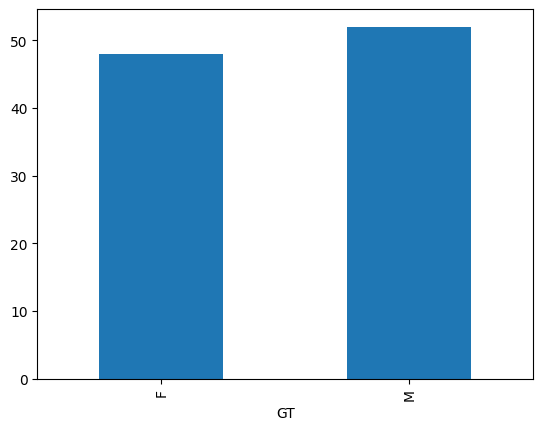

In [6]:
gt.plot.bar()

<AxesSubplot:ylabel='GT'>

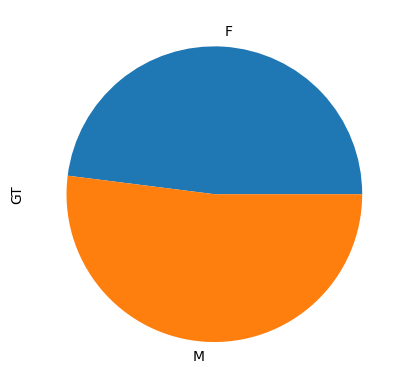

In [ ]:
gt.plot.pie()

<AxesSubplot:xlabel='GT'>

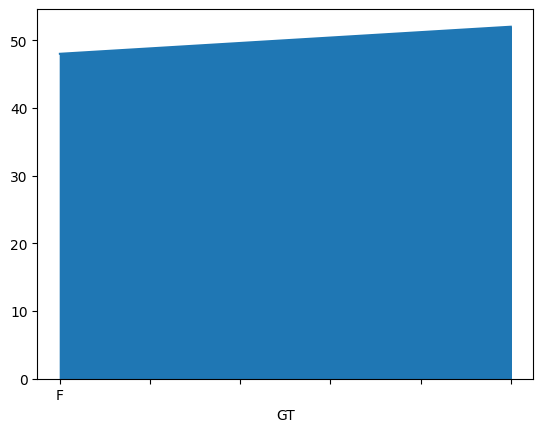

In [ ]:
gt.plot.area()

In [7]:
#2 Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3
cau2= pd.DataFrame(df, columns=['US_TBM1', 'US_TBM2', 'US_TBM3'])

In [ ]:
cau2.describe()

,US_TBM1,US_TBM2,US_TBM3
count,100.000000,100.000000,100.00000
mean,2.434480,2.559600,2.67176
std,0.391203,0.377656,0.29981
min,1.616000,1.768000,1.91600
25%,2.107000,2.223000,2.47300
50%,2.480000,2.588000,2.70600
75%,2.724000,2.893000,2.87400
max,3.232000,3.416000,3.31600


In [ ]:
#3 Hãy trình bày dữ liệu biến DT với các học sinh là nam
cau3= df[df['GT'] == 'M']
cau3.groupby('DT')['DT'].agg('count')

DT
1.0    1
6.0    1
Name: DT, dtype: int64

In [ ]:
#4 Hãy trình bày dữ liệu biến KV với các học sinh là nam thuộc dân tộc Kinh, có điểm thỏa mãn điều kiện (DH1 >= 5.0 và DH2 >= 4.0 và DH3 >= 4.0)
cau4= df[(df['GT'] =='M') & (df['DT']== 1)]
cau4.groupby('DT')['DT'].agg('count')

DT
1.0    1
Name: DT, dtype: int64

## **Phần 3**

In [ ]:
#1 Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked
cau31= df[df['GT']== 'F'].groupby(['XL1', 'XL2', 'XL3'])[['GT']].count()

In [ ]:
cau31.unstack()

GT           
XL3        G     K   TB
XL1 XL2                
G   G    1.0   NaN  NaN
K   G    NaN   1.0  NaN
    K    NaN  20.0  1.0
    TB   NaN   2.0  NaN
TB  K    NaN   8.0  1.0
    TB   NaN   3.0  6.0
Y   TB   NaN   1.0  3.0
    Y    NaN   NaN  1.0

<AxesSubplot:xlabel='XL1,XL2,XL3'>

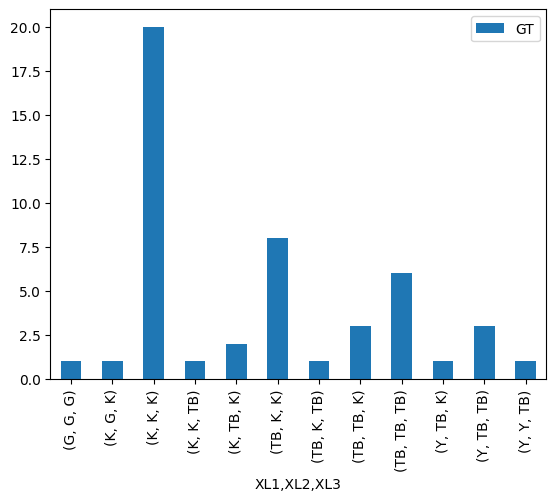

In [ ]:
cau31.plot.bar()

## **Phần 4**

<Axes: xlabel='T1'>

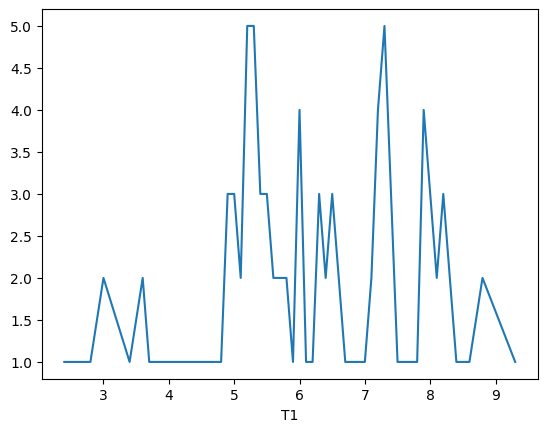

In [26]:
#1 Vẽ biểu đồ đường Simple cho biến T1
df.groupby('T1')['T1'].count().plot()

In [15]:
#2 Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau: a. Từ 0 đến dưới 5 = kém (ký hiệu k) (b)
df.loc[(df['T1'] < 5), 'phanlopt1']= 'kem'
df.loc[(df['T1'] >= 5) & (df['T1'] < 7), 'phanlopt1']= 'trungbinh'
df.loc[(df['T1'] >= 7) & (df['T1'] < 8), 'phanlopt1']= 'kha'
df.loc[(df['T1'] >= 8), 'phanlopt1']= 'gioi'

In [16]:
df.head()

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,...,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT,phanlopt1
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,...,7.54,7.01,K,K,K,2.800,3.016,2.804,0.0,kha
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,...,5.47,5.07,Y,TB,TB,1.876,2.188,2.028,0.0,trungbinh
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,...,5.38,6.04,TB,TB,TB,2.308,2.152,2.416,1.0,trungbinh
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,...,5.20,6.88,TB,TB,K,2.484,2.080,2.752,0.0,trungbinh
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,...,6.36,6.99,K,TB,K,2.600,2.544,2.796,0.0,trungbinh


In [17]:
#3 Lập bảng tần số cho biến phanloait1
dfphanlop1= df.groupby(['T1', 'phanlopt1'])[['T1', 'phanlopt1']].count()

In [18]:
unstackphanlop1= dfphanlop1.unstack()

In [19]:
unstackphanlop1.head()

T1                    phanlopt1                   
phanlopt1 gioi  kem kha trungbinh      gioi  kem kha trungbinh
T1                                                            
2.4        NaN  1.0 NaN       NaN       NaN  1.0 NaN       NaN
2.5        NaN  1.0 NaN       NaN       NaN  1.0 NaN       NaN
2.6        NaN  1.0 NaN       NaN       NaN  1.0 NaN       NaN
2.7        NaN  1.0 NaN       NaN       NaN  1.0 NaN       NaN
2.8        NaN  1.0 NaN       NaN       NaN  1.0 NaN       NaN

<Axes: xlabel='T1', ylabel='Count'>

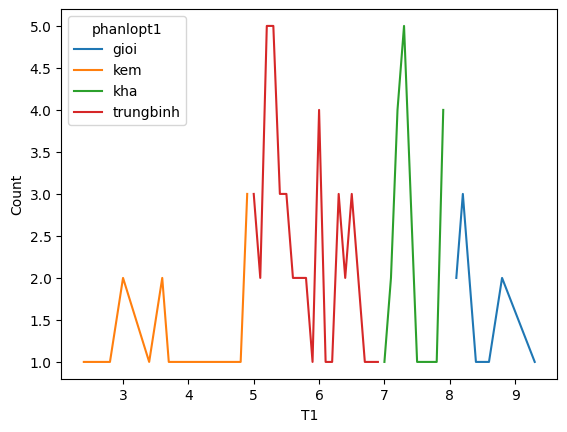

In [28]:
#4 Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1
unstackphanlop1['phanlopt1'].plot(ylabel= 'Count')

<Axes: xlabel='T1'>

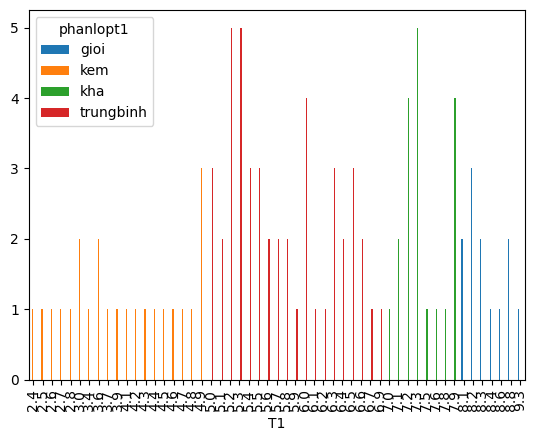

In [31]:
#5 Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1
unstackphanlop1['phanlopt1'].plot.bar()

## **Phần 5**

count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64


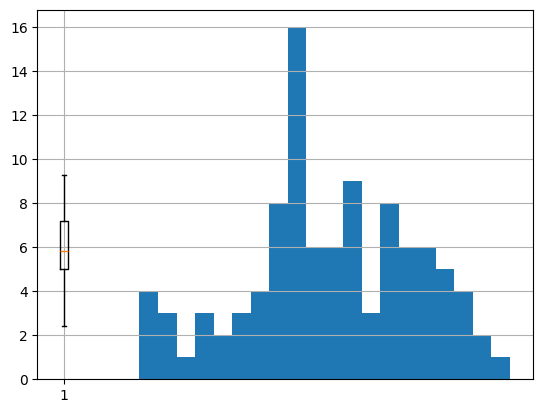

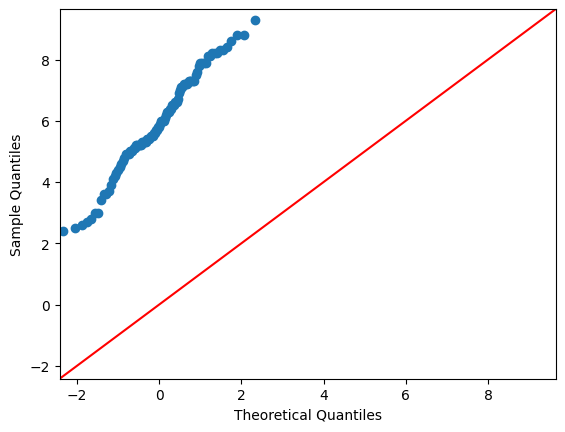

In [36]:
#1 Hãy mô tả và khảo sát phân phối cho biến T1
print(df['T1'].describe())
plt.boxplot(df['T1'])
df['T1'].hist(bins=20)
sm.qqplot(df['T1'], line='45')
plt.show()

<Axes: xlabel='phanlopt1', ylabel='T1'>

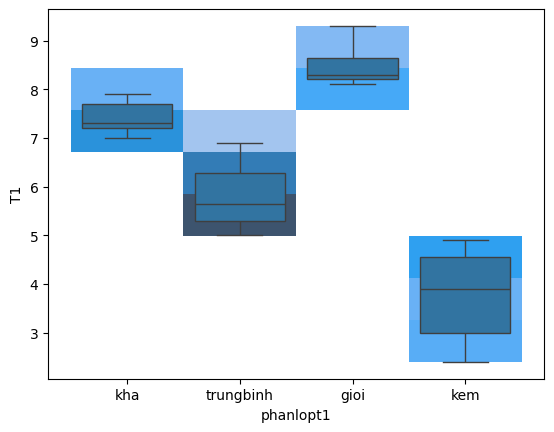

In [37]:
#2 Hãy mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phân lớp (phanlopT1)
sns.boxplot(y='T1', x='phanlopt1',data=df)
sns.histplot(y='T1', x='phanlopt1',data=df)

In [ ]:
#3 Hãy khảo sát tương quan giữa biến DH1 theo biến T1
dh1t1=df[['DH1','T1']]
sns.pairplot(dh1t1, kind='scatter')

plt.show()

In [ ]:
#4 Hãy khảo sát tương quan giữa biến DH1 theo biến T1 trên từng nhóm khu vực
dh1t1kv = df[['DH1', 'T1', 'KV']]
g= sns.FacetGrid(dh1t1kv, col='KV')
g.map(plt.scatter,'DH1','T1')
plt.show()

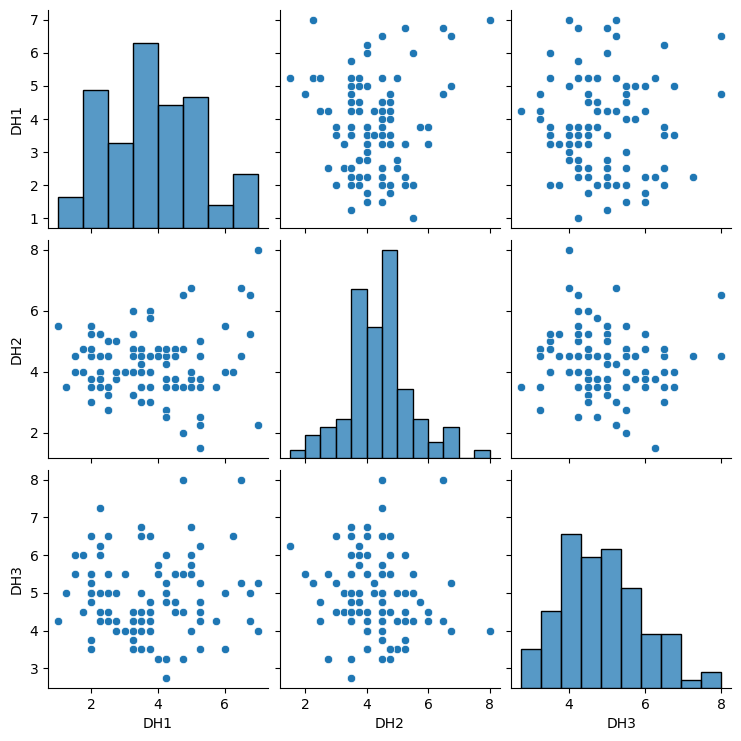

In [38]:
#5 Hãy khảo sát tương quan giữa các biến DH1, DH2, DH3
dh123 =  df[['DH1', 'DH2', 'DH3']]
sns.pairplot(dh123, kind='scatter')
plt.show()